In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:

data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

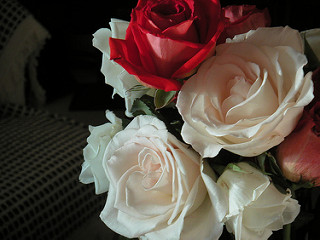

In [9]:
PIL.Image.open(str(roses[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [12]:
flowers_images_dict['sunflowers'][:5]

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg')]

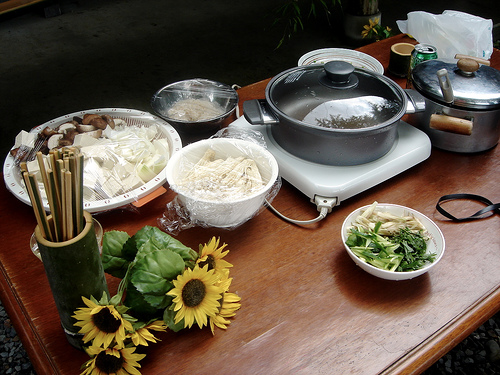

In [13]:
PIL.Image.open(str(flowers_images_dict['sunflowers'][25]))

In [14]:
img=cv2.imread(str(flowers_images_dict['sunflowers'][5]))

In [15]:
img.shape

(277, 320, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X,y=[],[]

In [18]:
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
    

In [19]:
y[0]

0

In [20]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [21]:
X=np.array(X)

In [22]:
X

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [23]:
y=np.array(y)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
# Scale the data
X_train = X_train / 255
X_test = X_test / 255

In [27]:
# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ])

0

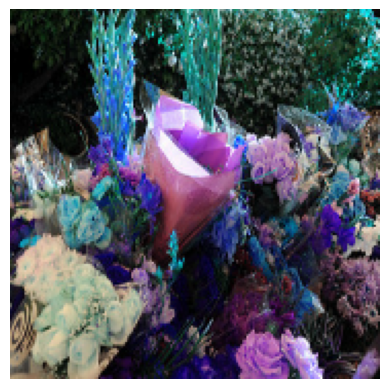

In [28]:
plt.axis('off')
plt.imshow(X[3])
y[3]

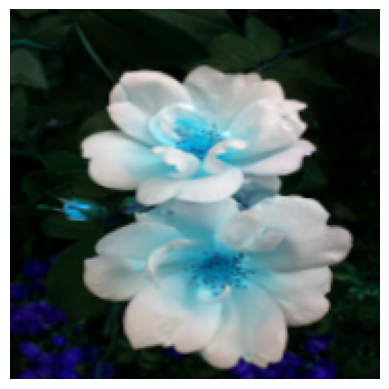

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [30]:
num_classes = 5

In [31]:
model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 46s 443ms/step - accuracy: 0.3070 - loss: 1.6766
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 383ms/step - accuracy: 0.5434 - loss: 1.1307
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 382ms/step - accuracy: 0.6085 - loss: 1.0054
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 419ms/step - accuracy: 0.6396 - loss: 0.9266
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 434ms/step - accuracy: 0.6571 - loss: 0.8750
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 409ms/step - accuracy: 0.6838 - loss: 0.8135
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 385ms/step - accuracy: 0.7409 - loss: 0.7040
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 382ms/step - accuracy: 0.7190 - loss: 0.7332
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 361ms/step - accuracy: 0.7266 - loss: 0.7217
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 368ms/step - accuracy: 0.7467 - loss: 0.6740
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 439ms/step - accuracy: 0.7579 - loss: 0.6476
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33

In [34]:
model.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.7236 - loss: 1.0434


[1.0813467502593994, 0.7254902124404907]

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(model.predict(X_test), axis=-1)))

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       176
           1       0.64      0.88      0.74       154
           2       0.87      0.65      0.75       226
           3       0.73      0.83      0.78       150
           4       0.75      0.62      0.68       212

    accuracy                           0.73       918
   macro avg       0.73      0.74      0.73       918
weighted avg       0.74      0.73      0.72       918

